In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

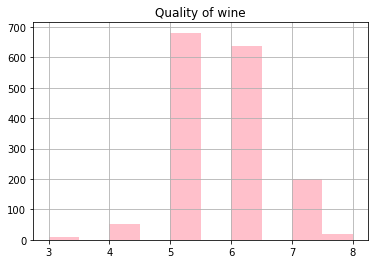

In [8]:
data['quality'].hist(color='pink')
plt.title('Quality of wine')
plt.show()

#### if a wine has quality value over 5 its is a good wine and if value is below 5 its bad win

In [210]:
y=data['quality']>6
y=y.astype(int)
X=data.drop(['quality'],axis = 1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

#### splitting data into Training data and Testing data

In [211]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=0.21)#we get the same train and test sets across different executions,

In [214]:
X_train.shape

(1263, 11)

In [215]:
y_test.shape

(336,)

In [216]:
X_train

array([[-0.58581266,  0.29149948,  0.14904159, ...,  0.96467901,
        -0.40216729, -0.20930812],
       [ 0.67815432,  0.34736425,  0.86794805, ...,  0.96467901,
        -0.16611498, -0.86637886],
       [ 1.08032563, -0.93752536,  1.8949573 , ..., -0.52555495,
         0.01092425,  1.94963861],
       ...,
       [-0.24109439,  0.23563472,  0.20039205, ..., -0.13679827,
         0.18796348, -0.86637886],
       [ 0.21852997,  1.32499765, -0.26176211, ..., -1.36786111,
        -0.6382196 , -0.96024611],
       [ 1.31013781, -0.49060724,  2.10035914, ..., -1.62703223,
         0.01092425,  2.79444385]])

#### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

#### Building SVM Classifier

In [217]:
from sklearn.svm import SVC

svc = SVC(C=10,kernel='rbf',gamma =0.1,random_state=14)

svc.fit(X_train,y_train)

SVC(C=10, gamma=0.1, random_state=14)

In [218]:
svc_predictions=svc.predict(X_test)

In [219]:
y_train.value_counts()

quality
0    1090
1     173
Name: count, dtype: int64

In [220]:
svc_predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [221]:
#svc.score(X_train,y_train)

In [222]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
  
# grid = GridSearchCV(SVC(), param_grid, cv=kf, refit = True, verbose = 3, scoring='accuracy')

In [223]:
# from sklearn.model_selection import GridSearchCV
# p = {'C':[0.1,0.8,0.9,1,1.2,1.3,1.4,1.5],
#      'kernal':['linear','rbf'],
#       'gamma ':[0.1,0.8,0.9,1,1.2,1.3,1.4,1.5]
#       }
# grid_svc = GridSearchCV(svc,param_grid=p,scoring ='accuracy',cv=10)

In [224]:
# grid_svc.fit(X_train,y_train)

In [225]:
# from sklearn.model_selection import GridSearchCV
# # Create parameter grid
# param_grid = {'C': [.01, .1, 1, 10, 100, 1000, 10000],
#                   'gamma': [0.0001, 0.001, 0.01, .1, 1, 10, 100, 1000]}

# # Create grid search 
# grid_search = GridSearchCV(SVC(),
#                            param_grid, 
#                            cv=5)
# # Fit grid search
# grid_search.fit(X_train, y_train)

In [226]:
# # Pull results from grid search
# results = pd.DataFrame(grid_search.cv_results_)
# hm_data = results.pivot(index='param_C', 
#                    columns='param_gamma',
#                    values='mean_test_score')

# # Plot heatmap
# fix, ax = plt.subplots(figsize=(9, 6))

# ax = sns.heatmap(hm_data,
#                  annot=True,
#                  cmap='RdBu',
#                  linecolor='white')

# ax.set_title('Hyperparameter Gridsearch', fontsize=16)
# ax.set_ylabel('C Parameter', fontsize=12)
# ax.set_xlabel('Gamma Parameter', fontsize=12)

# plt.show()

In [227]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [228]:
from sklearn.metrics import classification_report

In [229]:
c=confusion_matrix(y_test,svc_predictions)
a=accuracy_score(y_test,svc_predictions)
p=precision_score(y_test,svc_predictions)
q=classification_report(y_test,svc_predictions)
r=recall_score(y_test,svc_predictions)

In [230]:
print("classification_report:\n",q)

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       292
           1       0.63      0.43      0.51        44

    accuracy                           0.89       336
   macro avg       0.78      0.70      0.73       336
weighted avg       0.88      0.89      0.88       336



In [231]:
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[281  11]
 [ 25  19]]


In [232]:
print('Accuracy:',a*100)

Accuracy: 89.28571428571429


In [233]:
print('Precision:',p*100)

Precision: 63.33333333333333


In [234]:
print('Recall:',r*100)

Recall: 43.18181818181818
